# 군집화(Clustering) - K-Means Algorithm

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- iris data

In [39]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

- K-Means 모델 생성/학습

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [42]:
# 비지도학습이므로 y값이 없음
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [43]:
kmeans.labels_   

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [44]:
np.unique(kmeans.labels_, return_counts=True)   

(array([0, 1, 2]), array([47, 50, 53], dtype=int64))

In [45]:
df = pd.DataFrame({
    'target':iris.target, 'PC1':iris_pca[:,0],
    'PC2': iris_pca[:,1], 'cluster':kmeans.labels_
})
df.head()

,target,PC1,PC2,cluster
0,0,-2.264703,0.480027,1
1,0,-2.080961,-0.674134,1
2,0,-2.364229,-0.341908,1
3,0,-2.299384,-0.597395,1
4,0,-2.389842,0.646835,1


In [46]:
df.groupby(['target','cluster']).count()

PC1  PC2
target cluster          
0      1         50   50
1      0         11   11
       2         39   39
2      0         36   36
       2         14   14

- 데이터 시각화

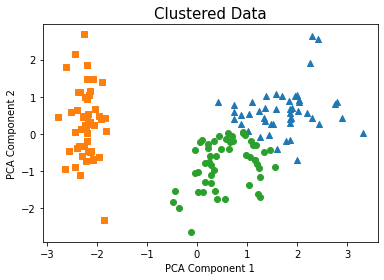

In [47]:
# 군집화된 결과를 차원축소하여 시각화
markers = ['^', 's', 'o']   # 산점도 점, 세모, 원

for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker)

plt.title('Clustered Data', fontsize=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

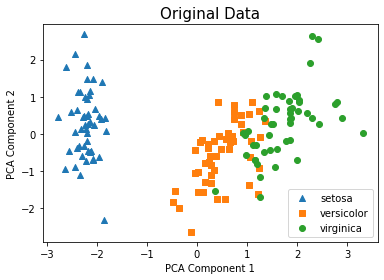

In [48]:
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.title('Original Data', fontsize=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 두 개의 그림 비교

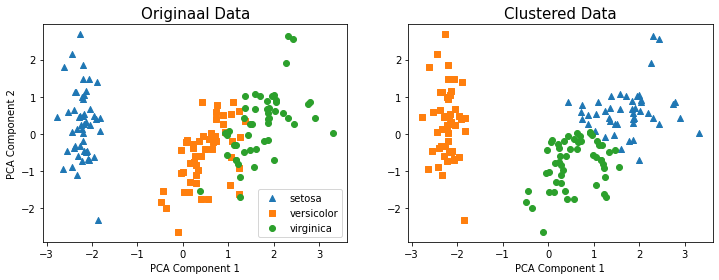

In [49]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]     # nrows = 1줄이니까 1개의 인덱스만 주면 됨
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

    if column == 'target':
        ax.legend()
        ax.set_title('Originaal Data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('Clustered Data', fontsize=15)
    
    ax.set_xlabel('PCA Component 1')
plt.show()

No handles with labels found to put in legend.


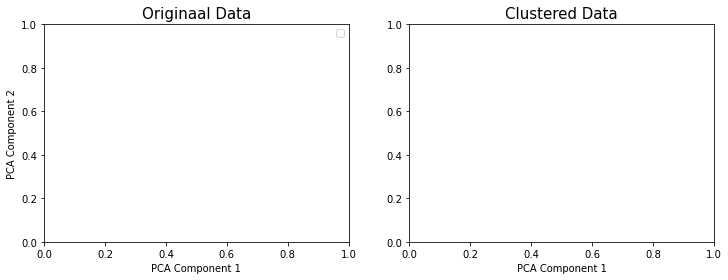

In [51]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1,2,k+1)    
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

    if k == 0:             # target
        plt.legend()
        plt.title('Originaal Data', fontsize=15)
        plt.ylabel('PCA Component 2')
    else:
        plt.title('Clustered Data', fontsize=15)
    
    plt.xlabel('PCA Component 1')
plt.show()